Le problème que nous allons résoudre aujourd'hui est le clustering 
cet ensemble de données particulier où nous avons la durée  et le nombre des pitstops des différents drivers ,on va regroupper  ces points de données dans divers groupes qu'on va essayez de découvrir. On va essayer donc d'identifier certaines caractéristiques de ces groupes tels que le nom ,l'âge la saison,durée et nombre des pitstops. 
Premièrement , il faut importer l'ensemble de données
ainsi qu'importer les bibliothèques essentielles.

In [85]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [86]:
#importation des données /chargement du fichier
import pandas 
Drivers = pandas.read_table("rank-bel-dernier.csv",sep=",",header=0)

In [87]:
# vérifions 
print(type(Drivers))

<class 'pandas.core.frame.DataFrame'>


In [88]:
#dimensions : nombre de lignes, nombre de colonnes
print(Drivers.shape)

(68, 6)


In [89]:
#Les noms des colonnes
print(Drivers.columns)

Index(['Drivers', 'Saison', 'Age', 'stops', 'duration', 'Rank'], dtype='object')


In [90]:
#Type de chaque colonne
print(Drivers.dtypes)

Drivers     object
Saison       int64
Age          int64
stops        int64
duration     int64
Rank         int64
dtype: object


In [91]:
#La fonction Python Pandas read_csv est utilisée pour lire ou charger des données à partir de fichiers CSV

#Afficher les n premières lignes de "df"
Drivers.head()

,Drivers,Saison,Age,stops,duration,Rank
0,Heikki Kovalainen,2013,32,5,22646,16
1,Karun Chandhok,2011,27,3,22458,22
2,Valtteri Bottas,2021,32,5,21071,6
3,Alexander Rossi,2015,24,3,26706,18
4,Pierre Gasly,2021,25,4,20850,4


array([[<AxesSubplot:xlabel='Saison', ylabel='Saison'>,
        <AxesSubplot:xlabel='Age', ylabel='Saison'>,
        <AxesSubplot:xlabel='stops', ylabel='Saison'>,
        <AxesSubplot:xlabel='duration', ylabel='Saison'>,
        <AxesSubplot:xlabel='Rank', ylabel='Saison'>,
        <AxesSubplot:xlabel='Cluster', ylabel='Saison'>],
       [<AxesSubplot:xlabel='Saison', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='stops', ylabel='Age'>,
        <AxesSubplot:xlabel='duration', ylabel='Age'>,
        <AxesSubplot:xlabel='Rank', ylabel='Age'>,
        <AxesSubplot:xlabel='Cluster', ylabel='Age'>],
       [<AxesSubplot:xlabel='Saison', ylabel='stops'>,
        <AxesSubplot:xlabel='Age', ylabel='stops'>,
        <AxesSubplot:xlabel='stops', ylabel='stops'>,
        <AxesSubplot:xlabel='duration', ylabel='stops'>,
        <AxesSubplot:xlabel='Rank', ylabel='stops'>,
        <AxesSubplot:xlabel='Cluster', ylabel='stops'>],
       [<AxesSubplot:x

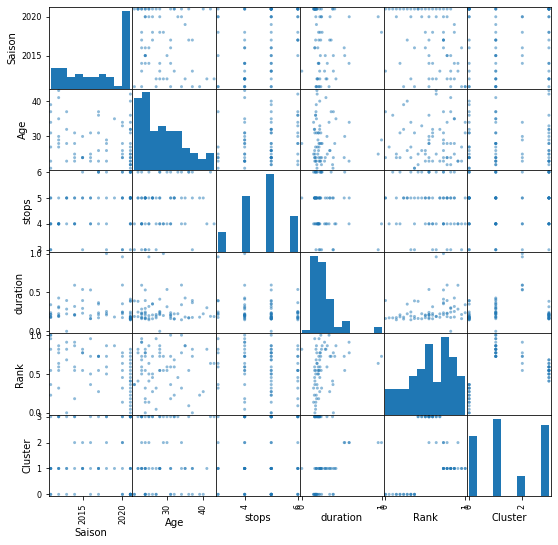

In [118]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix 
scatter_matrix(Drivers,figsize=(9,9))

# ***Avec plt.scatter***
Créez un nuage de points avec différentes tailles et couleurs de marqueurs. Les coordonnées de chaque point sont définies par deux colonnes de dataframe et des cercles pleins sont utilisés pour représenter chaque point. Ce type de graphique est utile pour voir des corrélations complexes entre deux variables.



Text(0, 0.5, 'duration')

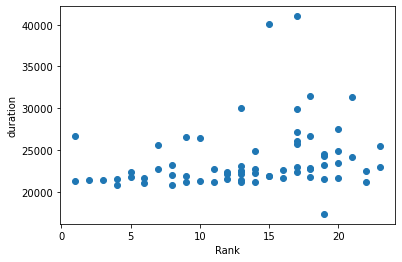

In [92]:
#Représentation graphique de données généralement
plt.scatter(Drivers['Rank'],Drivers['duration'])
#Ou Bien plt.scatter(df.nome_conlone,df.nome_conlone)
plt.xlabel('Rank')
plt.ylabel('duration')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


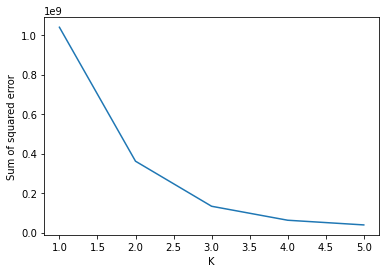

In [93]:
#Elbow Plot :  méthodes pour déterminer le nombre de clusters
sse = []
k_rng = range(1,6)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Drivers[['Rank','duration']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [100]:
#Nombre de K ajouté
km = KMeans(n_clusters=3)
#Calculer les centres de cluster et prédire l'index de cluster 
Vecteur_n_1 = km.fit_predict(Drivers[['Rank','duration']])
Vecteur_n_1

array([0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 0])

🌎 partir de la méthode du coude qui montre la courbe ci-dessous, nous avons choisi K = 3 au point linéaire cst


In [101]:
km.cluster_centers_


array([[1.2920000e+01, 2.2044100e+04],
       [1.6000000e+01, 4.0520000e+04],
       [1.5125000e+01, 2.7279625e+04]])

In [102]:
#ajouter le Valeur de Vecteur_n_1 en df
Drivers['Cluster']=Vecteur_n_1
Drivers.head()

,Drivers,Saison,Age,stops,duration,Rank,Cluster
0,Heikki Kovalainen,2013,32,5,22646,16,0
1,Karun Chandhok,2011,27,3,22458,22,0
2,Valtteri Bottas,2021,32,5,21071,6,0
3,Alexander Rossi,2015,24,3,26706,18,2
4,Pierre Gasly,2021,25,4,20850,4,0


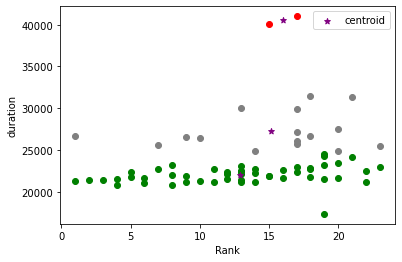

In [103]:
Drivers1 = Drivers[Drivers.Cluster==0]
Drivers2 = Drivers[Drivers.Cluster==1]
Drivers3 = Drivers[Drivers.Cluster==2]
#Drivers4 = Drivers[Drivers.Cluster==3]

plt.scatter(Drivers1['Rank'],Drivers1['duration'],color='green')
plt.scatter(Drivers2['Rank'],Drivers2['duration'],color='red')
plt.scatter(Drivers3['Rank'],Drivers3['duration'],color='grey')
#plt.scatter(Drivers4['Rank'],Drivers4['duration'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Rank')
plt.ylabel('duration')
plt.legend()

Nous remarquons que les nuages de points est là mais il ya un petit problème , ce cluster rouge a l'air bien mais il ya un problème avec ces deux clusters ,ils ne sont pas regroupés proement,un problème  est survenu parce que notre mise à l'échelle n'est pas correcte,notre axe des y est mis à une échelle de  20000 , 40000 et la plage de l'axe des x est assez étroite, c'est à peine 20 contre ici 40000. Alors quand vous ne dimensionnez pas correctement vos fonctionnalités, vous pourriez avoir ce problème

In [104]:
#MinMaxScaler réduit les données dans la plage donnée, généralement de 0 à 1 pour les données, 
#Il transforme les données en mettant à l'échelle les fonctionnalités dans une plage donnée.
#exemple (Age,Income($)) de (27,7000)--> transformé a (0.05,0.2). 

scaler = MinMaxScaler()

scaler.fit(Drivers[['duration']])
Drivers['duration'] = scaler.transform(Drivers[['duration']])

scaler.fit(Drivers[['Rank']])
Drivers['Rank'] = scaler.transform(Drivers[['Rank']])

In [105]:
Drivers.head()


,Drivers,Saison,Age,stops,duration,Rank,Cluster
0,Heikki Kovalainen,2013,32,5,0.224179,0.681818,0
1,Karun Chandhok,2011,27,3,0.216238,0.954545,0
2,Valtteri Bottas,2021,32,5,0.157648,0.227273,0
3,Alexander Rossi,2015,24,3,0.395683,0.772727,2
4,Pierre Gasly,2021,25,4,0.148312,0.136364,0


In [106]:
#Elbow Plot :  méthodes pour déterminer le nombre de clusters
sse = []
k_rng = range(1,7)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Drivers[['duration','Rank']])
    sse.append(km.inertia_)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


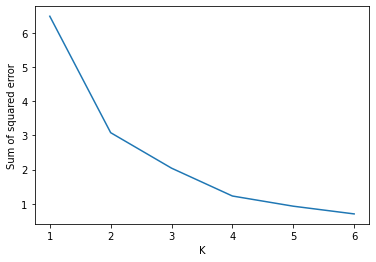

In [107]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
#il ya d'autre méthode qui s'apelle "Le traçage des scores de silhouette moyens"

In [108]:
#Nombre de K ajouté
km = KMeans(n_clusters=4)
#Calculer les centres de cluster et prédire l'index de cluster 
Vecteur_n_1 = km.fit_predict(Drivers[['duration','Rank']])
Vecteur_n_1 

array([3, 1, 0, 1, 0, 3, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 0, 1, 1, 3, 1, 3,
       2, 0, 3, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 3, 1, 2, 1, 3, 0, 3, 1, 1,
       2, 0, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 0, 0, 1,
       1, 1])

In [109]:
#ajouter le Valeur de Vecteur_n_1 en df
Drivers['Cluster']=Vecteur_n_1
Drivers.head()

,Drivers,Saison,Age,stops,duration,Rank,Cluster
0,Heikki Kovalainen,2013,32,5,0.224179,0.681818,3
1,Karun Chandhok,2011,27,3,0.216238,0.954545,1
2,Valtteri Bottas,2021,32,5,0.157648,0.227273,0
3,Alexander Rossi,2015,24,3,0.395683,0.772727,1
4,Pierre Gasly,2021,25,4,0.148312,0.136364,0


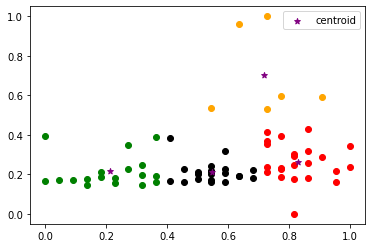

In [110]:
df1 =Drivers[Drivers.Cluster==0]
df2 = Drivers[Drivers.Cluster==1]
df3 = Drivers[Drivers.Cluster==2]
df4 = Drivers[Drivers.Cluster==3]

plt.scatter(df1.Rank,df1['duration'],color='green')
plt.scatter(df2.Rank,df2['duration'],color='red')
plt.scatter(df3.Rank,df3['duration'],color='orange')
plt.scatter(df4.Rank,df4['duration'],color='black')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,0],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()

In [111]:
Drivers.head()

,Drivers,Saison,Age,stops,duration,Rank,Cluster
0,Heikki Kovalainen,2013,32,5,0.224179,0.681818,3
1,Karun Chandhok,2011,27,3,0.216238,0.954545,1
2,Valtteri Bottas,2021,32,5,0.157648,0.227273,0
3,Alexander Rossi,2015,24,3,0.395683,0.772727,1
4,Pierre Gasly,2021,25,4,0.148312,0.136364,0


In [119]:
# valeurs de toutes les colonnes
#colonnes => 0:5 (0 à 5 [non inclus])
#lignes = : (toutes les colonnes)
V_SansLabels=Drivers.iloc[:,1:5];
#Labels
V_Labels=Drivers.iloc[:,0];

In [122]:
#k-means 
import numpy as np
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=2);
kmeans.fit(V_SansLabels);
#index triés des groupes 
idk = np.argsort(kmeans.labels_);
#affichage des observations et leurs groupes 
print(pandas.DataFrame(V_SansLabels.index[idk],kmeans.labels_[idk]));
kmeans.labels_
#distances aux centres de classes des observations 
print(kmeans.transform(V_SansLabels));
#correspondance avec les groupes réels 
pandas.crosstab(V_Labels,kmeans.labels_)

     0
0    0
0   38
0   37
0   36
0   34
..  ..
1   31
1   32
1   66
1   39
1   67

[68 rows x 1 columns]
[[ 4.19738123  8.30727911]
 [ 9.527458    6.74801457]
 [ 5.582598    8.0990513 ]
 [11.00791878  2.82353324]
 [10.94804409  3.82683781]
 [ 4.35918721  8.73205497]
 [ 3.8657013  12.86268418]
 [11.84523519  2.38246922]
 [ 9.57617029  3.04927619]
 [10.70368997  3.2493337 ]
 [ 1.82107003 11.24279291]
 [ 4.44672538  6.95317424]
 [11.02461322  3.36836325]
 [ 7.09289647  3.56017473]
 [ 9.26980259 18.88478843]
 [12.00793593  3.76174298]
 [14.72896259  5.61629951]
 [ 2.85671971 10.31033645]
 [11.80983239  2.28308578]
 [ 7.10386363  4.52113329]
 [12.22239145  4.63503661]
 [10.95491615  4.06758987]
 [ 6.17797664  4.30910535]
 [ 9.20749496  4.38293096]
 [ 5.58253826  8.0989995 ]
 [10.0041102   3.2527094 ]
 [ 5.10741891 11.86112844]
 [ 8.81052059  1.25824731]
 [ 6.38522304  8.7510445 ]
 [11.8098155   3.91244325]
 [11.60245484  3.28909275]
 [ 8.81026672  5.65819299]
 [10.77388242  1.58041205]
 [

col_0,0,1
Drivers,,
Adrian Sutil,1,0
Alexander Albon,0,1
Alexander Rossi,0,1
Antonio Giovinazzi,0,1
Brendon Hartley,0,1
...,...,...
Valtteri Bottas,1,0
Vitaly Petrov,0,1
Vitantonio Liuzzi,1,0


    K-MEANS, à la différence de la CAH, ne fournit pas d’outils d’aide à la détection du nombre de classes. 
    Nous devons les programmer sous Python ou utiliser des procédures proposées par des packages dédiés. 
    Le schéma est souvent le même : on fait varier le nombre de groupes et on surveille l’évolution d’un indicateur de qualité
    de la solution c.-à-d. l’aptitude des individus à être plus proches de ses congénères du même groupe que des individus 
    des autres groupes. Dans ce qui suit, on calcule la métrique «silhouette »
    pour différents nombres de groupes issus de la méthode des centres mobiles.

In [112]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [113]:
# valeurs de toutes les colonnes
#colonnes => 0:5 (0 à 5 [non inclus])
#lignes = : (toutes les colonnes)
V_SansLabels=Drivers.iloc[:,1:5];
#Labels
V_Labels=Drivers.iloc[:,0];

In [114]:
#générer la matrice des distances 
Z = linkage(V_SansLabels,method='ward',metric='euclidean')

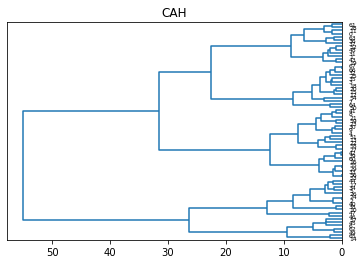

In [115]:
#affichage du dendrogramme 
plt.title("CAH") 
dendrogram(Z,labels=V_SansLabels.index,orientation='left',color_threshold=0) 
plt.show()

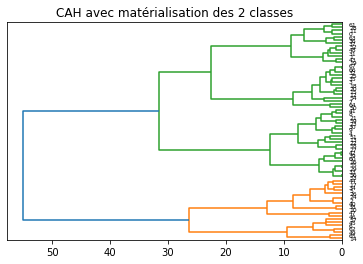

[2 2 1 2 2 1 1 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2
 2 1 2 1 2 2 2 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2]
     0
1   38
1   26
1   47
1   17
1   46
..  ..
2   32
2   66
2   35
2   20
2   67

[68 rows x 1 columns]


In [116]:
# matérialisation des deux classes (hauteur t = 43) 
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=V_SansLabels.index,orientation='left',color_threshold=43) 
plt.show()

#découpage à la hauteur t = 43==> identifiants de 2 groupes obtenus 
groupes_cah = fcluster(Z,t=43,criterion='distance') 
print(groupes_cah)

#index triés des groupes 
import numpy as np 
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pandas.DataFrame(V_SansLabels.index[idg],groupes_cah[idg]))

In [117]:
#correspondance les vrais labels avec les groupes de la CAH 
pandas.crosstab(V_Labels,groupes_cah)

col_0,1,2
Drivers,,
Adrian Sutil,0,1
Alexander Albon,0,1
Alexander Rossi,0,1
Antonio Giovinazzi,0,1
Brendon Hartley,0,1
...,...,...
Valtteri Bottas,1,0
Vitaly Petrov,0,1
Vitantonio Liuzzi,0,1
